In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kanikshasharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
data=pd.read_csv(' python_developer.csv')

In [4]:
data[['skills']]

,skills
0,python developer
1,Programmer
2,"Python , django , flask , aws , github..."
3,"Core Python , Frame Works"
4,"CSS , Solr , Github , Django , MySQL ..."
5,"rest , python , open source , django , ..."
6,"coding , python , erp , software develop..."
7,"CSS , Solr , Github , Django , MySQL ..."
8,"rest , python , open source , django , ..."
9,"coding , python , erp , software develop..."


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

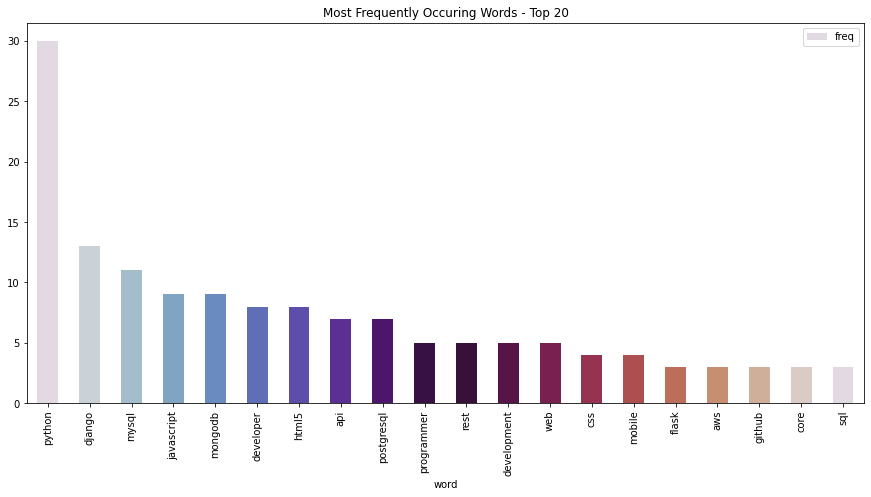

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cv = CountVectorizer()
words = cv.fit_transform(data['skills'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'WordCloud ')

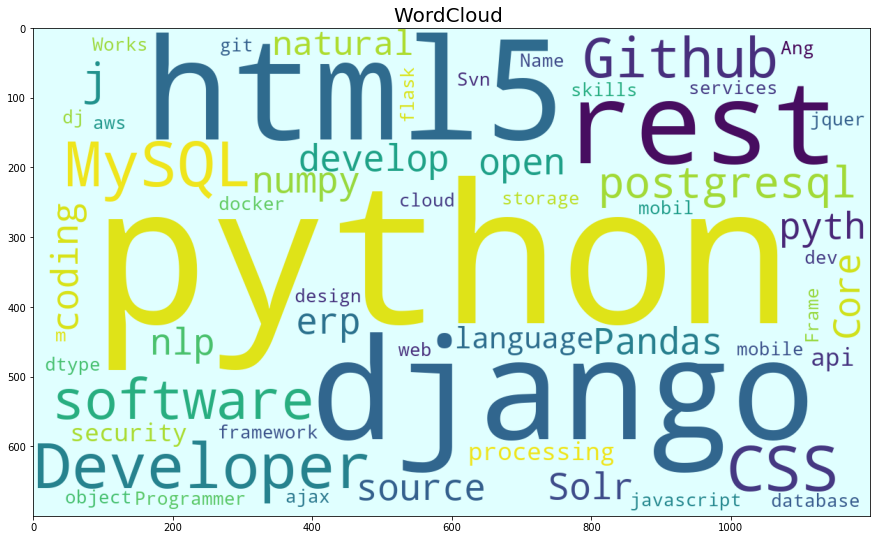

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(data['skills']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

In [22]:
corpus = []


review = data['skills']


ps = PorterStemmer()
review = [ps.stem(word) for word in review ]
review = ' '.join(review)
corpus.append(review)

In [23]:
corpus

['python develop programm python  ,  django  ,  flask  ,  aws  ,  github  ,  ml libraries  ,  javascript core python  ,   frame work css  ,  solr  ,  github  ,  django  ,  mysql  ,  javascript  ,  html  ,  mongodb  ,  elastic search  ,  python rest  ,  python  ,  open source  ,  django  ,  devops  ,  mysql  ,  api  ,  aws  ,  mongodb  ,  postgres  ,  sql coding  ,  python  ,  erp  ,  software development  ,  postgresql  ,  web application  ,  backend developer  ,  product development  ,  threading  ,  python developer  ,  python programmer  ,  javascript css  ,  solr  ,  github  ,  django  ,  mysql  ,  javascript  ,  html  ,  mongodb  ,  elastic search  ,  python rest  ,  python  ,  open source  ,  django  ,  devops  ,  mysql  ,  api  ,  aws  ,  mongodb  ,  postgres  ,  sql coding  ,  python  ,  erp  ,  software development  ,  postgresql  ,  web application  ,  backend developer  ,  product development  ,  threading  ,  python developer  ,  python programmer  ,  javascript python deve

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer( max_features = 2000)
X = vectorizer.fit_transform(data['skills'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (25, 73)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [70]:
true_k = 2
model = KMeans()
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])



Top terms per cluster:
Cluster 0:
 machine
 learning
 language
 natural
 nlp
 nosql
 processing
 api
 services
 cloud
Cluster 1:
 html5
 rest
 django
 javascript
 api
 python
 security
 postgresql
 mongodb
 docker


In [72]:
Y = vectorizer.transform(["python R mysql django"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Cluster number : [1]


In [73]:
Y = vectorizer.transform([" R "])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Cluster number : [5]


In [74]:
Y = vectorizer.transform([" nlp "])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Cluster number : [0]
